<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Sameer_Chapter_2_mimic_end_to_end_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RANDOM FOREST

# Importing Libraries

In [3]:
!git clone https://github.com/iupui-soic/handson-ml-mimic-iv.git

fatal: destination path 'handson-ml-mimic-iv' already exists and is not an empty directory.


In [4]:
import os
print(os.getcwd())

/content


In [5]:
import os
os.chdir('/content/handson-ml-mimic-iv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import dask.dataframe as dd
import pandas as pd

In [8]:
from mimic.mimic import MIMIC, MIMICManipulations
from utils.util import generic_utils
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
generic_util_instance = generic_utils()

# Load Data

In [10]:
df = pd.read_csv('/content/drive/MyDrive/dataset/ch_02_end_to_end_ml.csv')


In [11]:
df.head()

,subject_id,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,...,drg_code,medication,event_txt,drug,route,org_name,test_name,quantity,ab_name,curr_service
0,10000032,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,...,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,NaN,MED
1,10000068,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,10000084,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,...,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,NaN,MED
3,10000108,EU OBSERVATION,P38XXV,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,...,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,NaN,MED
4,10000117,EU OBSERVATION,P2358X,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,0,...,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,NaN,MED


In [12]:
df.columns

Index(['subject_id', 'admission_type', 'admit_provider_id',
       'admission_location', 'discharge_location', 'insurance', 'language',
       'marital_status', 'race', 'hospital_expire_flag', 'los_admission',
       'gender', 'anchor_age', 'eventtype', 'careunit', 'diagnosis_icd_code',
       'procedures_icd_code', 'drg_type', 'drg_code', 'medication',
       'event_txt', 'drug', 'route', 'org_name', 'test_name', 'quantity',
       'ab_name', 'curr_service'],
      dtype='object')

In [13]:
df.shape

(180677, 28)

# Data Exploration

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180677 entries, 0 to 180676
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            180677 non-null  int64  
 1   admission_type        180677 non-null  object 
 2   admit_provider_id     180676 non-null  object 
 3   admission_location    180677 non-null  object 
 4   discharge_location    128343 non-null  object 
 5   insurance             180677 non-null  object 
 6   language              180677 non-null  object 
 7   marital_status        173425 non-null  object 
 8   race                  180677 non-null  object 
 9   hospital_expire_flag  180677 non-null  int64  
 10  los_admission         180677 non-null  float64
 11  gender                180677 non-null  object 
 12  anchor_age            180677 non-null  int64  
 13  eventtype             180677 non-null  object 
 14  careunit              126370 non-null  object 
 15  

In [15]:
df.describe()

,subject_id,hospital_expire_flag,los_admission,anchor_age,drg_code,quantity
count,1.806770e+05,180677.000000,180677.000000,180677.000000,144396.000000,0.0
mean,1.501326e+07,0.028620,4.209422,55.375034,344.668758,NaN
std,2.884716e+06,0.166737,6.199334,20.268894,239.510152,NaN
min,1.000003e+07,0.000000,0.000694,18.000000,1.000000,NaN
25%,1.250880e+07,0.000000,0.979861,39.000000,166.000000,NaN
50%,1.502097e+07,0.000000,2.563194,57.000000,283.000000,NaN
75%,1.751168e+07,0.000000,4.938889,71.000000,530.000000,NaN
max,1.999999e+07,1.000000,249.585417,91.000000,989.000000,NaN


In [16]:
df.dtypes

subject_id                int64
admission_type           object
admit_provider_id        object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
race                     object
hospital_expire_flag      int64
los_admission           float64
gender                   object
anchor_age                int64
eventtype                object
careunit                 object
diagnosis_icd_code       object
procedures_icd_code      object
drg_type                 object
drg_code                float64
medication               object
event_txt                object
drug                     object
route                    object
org_name                 object
test_name                object
quantity                float64
ab_name                  object
curr_service             object
dtype: object

# Preparing Data for Machine Learning Algorithms

# Data Cleaning

In [17]:
# List of columns to drop
columns_to_drop = ['subject_id', 'admit_provider_id', 'quantity',  'procedures_icd_code']

# Check for columns present in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(existing_columns_to_drop, axis=1, inplace=True)


In [18]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,los_admission,gender,...,drg_type,drg_code,medication,event_txt,drug,route,org_name,test_name,ab_name,curr_service
0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,0.786111,F,...,APR,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,MED
1,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,4.538889,M,...,APR,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,MED
3,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.407639,M,...,NaN,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,MED
4,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,0,0.532639,F,...,APR,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,MED


In [19]:
df.admission_type.value_counts()

admission_type
EW EMER.                       60396
EU OBSERVATION                 43178
URGENT                         22710
OBSERVATION ADMIT              20827
SURGICAL SAME DAY ADMISSION    15566
DIRECT OBSERVATION              7228
DIRECT EMER.                    4866
ELECTIVE                        3530
AMBULATORY OBSERVATION          2376
Name: count, dtype: int64

In [20]:
df.admission_type.isna().sum()

0

In [21]:
df.admission_location.value_counts()

admission_location
EMERGENCY ROOM                            96829
PHYSICIAN REFERRAL                        46887
TRANSFER FROM HOSPITAL                    20228
WALK-IN/SELF REFERRAL                      6577
CLINIC REFERRAL                            2717
PROCEDURE SITE                             2673
PACU                                       2094
INTERNAL TRANSFER TO OR FROM PSYCH         1261
TRANSFER FROM SKILLED NURSING FACILITY     1101
INFORMATION NOT AVAILABLE                   217
AMBULATORY SURGERY TRANSFER                  93
Name: count, dtype: int64

In [22]:
df.admission_location.isna().sum()

0

In [23]:
df = generic_util_instance.replace_nan(df, 'admission_location', 'Other')
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,los_admission,gender,...,drg_type,drg_code,medication,event_txt,drug,route,org_name,test_name,ab_name,curr_service
0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,0.786111,F,...,APR,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,MED
1,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,4.538889,M,...,APR,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,MED
3,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,0,0.407639,M,...,NaN,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,MED
4,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,0,0.532639,F,...,APR,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,MED


In [24]:
df.shape

(180677, 24)

In [25]:
df = generic_util_instance.replace_column_value(df, 'admission_location', 3000, 'Other')
df.admission_location.value_counts()

admission_location
EMERGENCY ROOM            96829
PHYSICIAN REFERRAL        46887
TRANSFER FROM HOSPITAL    20228
Other                     10156
WALK-IN/SELF REFERRAL      6577
Name: count, dtype: int64

In [26]:
df.discharge_location.isna().sum()

52334

In [27]:
df.discharge_location.value_counts()

discharge_location
HOME                            67908
HOME HEALTH CARE                25796
SKILLED NURSING FACILITY        16844
REHAB                            5354
DIED                             5106
CHRONIC/LONG TERM ACUTE CARE     2484
HOSPICE                          1469
PSYCH FACILITY                    980
AGAINST ADVICE                    832
ACUTE HOSPITAL                    796
OTHER FACILITY                    540
ASSISTED LIVING                   211
HEALTHCARE FACILITY                23
Name: count, dtype: int64

In [28]:
df = generic_util_instance.replace_nan(df, 'discharge_location', 'Other')
df = generic_util_instance.replace_column_value(df, 'discharge_location', 2000, 'Other')
df.discharge_location.value_counts()

discharge_location
HOME                            67908
Other                           57185
HOME HEALTH CARE                25796
SKILLED NURSING FACILITY        16844
REHAB                            5354
DIED                             5106
CHRONIC/LONG TERM ACUTE CARE     2484
Name: count, dtype: int64

In [29]:
df.discharge_location.isna().sum()

0

In [30]:
df.insurance.value_counts()

insurance
Other       110008
Medicare     55577
Medicaid     15092
Name: count, dtype: int64

In [31]:
df.insurance.isna().sum()

0

In [32]:
df.language.isna().sum()

0

In [33]:
df.language.value_counts()

language
ENGLISH    163350
?           17327
Name: count, dtype: int64

In [34]:
df = generic_util_instance.replace_column_value(df, 'language', 23000, 'Other')
df.language.value_counts()

language
ENGLISH    163350
Other       17327
Name: count, dtype: int64

In [35]:
df.marital_status.isna().sum()

7252

In [36]:
df.marital_status.value_counts()

marital_status
MARRIED     77798
SINGLE      67537
WIDOWED     16725
DIVORCED    11365
Name: count, dtype: int64

In [37]:
df = generic_util_instance.replace_nan(df, 'marital_status', 'Other')
df.marital_status.value_counts()

marital_status
MARRIED     77798
SINGLE      67537
WIDOWED     16725
DIVORCED    11365
Other        7252
Name: count, dtype: int64

In [38]:
df.marital_status.isna().sum()

0

In [39]:
df.hospital_expire_flag.value_counts()

hospital_expire_flag
0    175506
1      5171
Name: count, dtype: int64

In [40]:
df.hospital_expire_flag.isna().sum()

0

In [41]:
df.gender.value_counts()

gender
F    95698
M    84979
Name: count, dtype: int64

In [42]:
df.gender.isna().sum()

0

In [43]:
df.anchor_age.isna().sum()

0

In [44]:
df.eventtype.isna().sum()

0

In [45]:
df.eventtype.value_counts()

eventtype
admit        54394
discharge    54307
transfer     36120
ED           35856
Name: count, dtype: int64

In [46]:
df.careunit.isna().sum()

54307

In [47]:
df.careunit.value_counts()

careunit
Emergency Department                                35856
Medicine                                            14181
Emergency Department Observation                    11299
Discharge Lounge                                     5909
Neurology                                            4902
Med/Surg                                             4823
Medicine/Cardiology                                  4539
Labor & Delivery                                     3613
Med/Surg/Trauma                                      3316
Med/Surg/GYN                                         3089
Vascular                                             2588
Obstetrics (Postpartum & Antepartum)                 2524
Surgery/Trauma                                       2412
PACU                                                 2356
Hematology/Oncology                                  2176
Transplant                                           1983
Cardiac Surgery                                      1954
Medic

In [48]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,los_admission,gender,...,drg_type,drg_code,medication,event_txt,drug,route,org_name,test_name,ab_name,curr_service
0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,0.786111,F,...,APR,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,NaN,TOXOPLASMA IgG ANTIBODY,NaN,MED
1,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MED
2,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,4.538889,M,...,APR,42.0,Pramipexole,Administered,QUEtiapine Fumarate,PO/NG,NaN,"Blood Culture, Routine",NaN,MED
3,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0,0.407639,M,...,NaN,NaN,NaN,NaN,NaN,NaN,ACTINOBACILLUS ACTINOMYCETEMCOMITANS,WOUND CULTURE,NaN,MED
4,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,DIVORCED,WHITE,0,0.532639,F,...,APR,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,CAMPYLOBACTER JEJUNI,CAMPYLOBACTER CULTURE,NaN,MED


In [49]:
df.columns

Index(['admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'race',
       'hospital_expire_flag', 'los_admission', 'gender', 'anchor_age',
       'eventtype', 'careunit', 'diagnosis_icd_code', 'drg_type', 'drg_code',
       'medication', 'event_txt', 'drug', 'route', 'org_name', 'test_name',
       'ab_name', 'curr_service'],
      dtype='object')

In [50]:
df.diagnosis_icd_code.isna().sum()

93

In [51]:
 df = generic_util_instance.replace_nan(df, 'diagnosis_icd_code', 'ICD_DIAGNOSIS')
 df.diagnosis_icd_code.isna().sum()

0

In [52]:
df.drg_type.isna().sum()

36281

In [53]:
df.drg_type.value_counts().to_dict()

{'APR': 137699, 'HCFA': 6697}

In [54]:
df = generic_util_instance.replace_nan(df, 'drg_type', 'OTHER')
df.drg_type.value_counts()

drg_type
APR      137699
OTHER     36281
HCFA       6697
Name: count, dtype: int64

In [55]:
df.drg_code.isna().sum()

36281

In [56]:
df.drg_code.value_counts().to_dict()

{560.0: 6263,
 540.0: 3580,
 720.0: 3548,
 45.0: 2531,
 166.0: 2227,
 194.0: 2209,
 175.0: 2112,
 21.0: 1958,
 139.0: 1907,
 55.0: 1868,
 383.0: 1811,
 313.0: 1794,
 254.0: 1759,
 174.0: 1751,
 163.0: 1719,
 201.0: 1702,
 347.0: 1540,
 53.0: 1514,
 463.0: 1511,
 44.0: 1501,
 308.0: 1500,
 751.0: 1491,
 24.0: 1402,
 302.0: 1398,
 284.0: 1369,
 301.0: 1316,
 263.0: 1232,
 249.0: 1186,
 282.0: 1177,
 190.0: 1146,
 304.0: 1107,
 753.0: 1068,
 710.0: 1068,
 134.0: 1066,
 253.0: 1052,
 197.0: 1035,
 165.0: 1010,
 721.0: 1003,
 321.0: 994,
 315.0: 963,
 244.0: 959,
 58.0: 942,
 204.0: 929,
 351.0: 876,
 343.0: 856,
 192.0: 855,
 241.0: 850,
 812.0: 837,
 137.0: 830,
 191.0: 825,
 121.0: 813,
 420.0: 809,
 813.0: 798,
 247.0: 792,
 310.0: 789,
 140.0: 764,
 248.0: 764,
 403.0: 759,
 330.0: 743,
 135.0: 734,
 775.0: 719,
 120.0: 718,
 245.0: 691,
 220.0: 690,
 683.0: 686,
 950.0: 673,
 861.0: 667,
 207.0: 657,
 750.0: 644,
 171.0: 640,
 912.0: 633,
 519.0: 632,
 663.0: 629,
 281.0: 624,
 162.0:

In [57]:
df = generic_util_instance.replace_nan(df, 'drg_code', 0.0)
df.drg_code.isna().sum()

0

In [58]:
df.drug.isna().sum()

22293

In [59]:
df.drug.value_counts().to_dict()

{'Sodium Chloride 0.9%  Flush': 9156,
 'Acetaminophen': 7995,
 'Heparin': 5161,
 '0.9% Sodium Chloride': 5044,
 'Docusate Sodium': 4991,
 'Insulin': 3584,
 'Senna': 3430,
 'Ondansetron': 3276,
 'HYDROmorphone (Dilaudid)': 3165,
 'Lactated Ringers': 2648,
 'Potassium Chloride': 2515,
 'Bisacodyl': 2487,
 'Iso-Osmotic Dextrose': 2290,
 '5% Dextrose': 2259,
 'Morphine Sulfate': 2241,
 'Metoprolol Tartrate': 2007,
 'Aspirin': 1991,
 'OxycoDONE (Immediate Release) ': 1906,
 'Bag': 1822,
 'Furosemide': 1803,
 'Sodium Chloride 0.9%': 1677,
 'Ibuprofen': 1659,
 'Influenza Vaccine Quadrivalent': 1628,
 'Lorazepam': 1558,
 'Influenza Virus Vaccine': 1459,
 'Calcium Carbonate': 1410,
 'OxyCODONE (Immediate Release)': 1267,
 'Lisinopril': 1237,
 'Dextrose 50%': 1235,
 'Atorvastatin': 1217,
 'Omeprazole': 1202,
 'Milk of Magnesia': 1200,
 'Ketorolac': 1132,
 'Glucagon': 1091,
 'Warfarin': 1001,
 'Levothyroxine Sodium': 982,
 'Simethicone': 955,
 'NS': 866,
 'Polyethylene Glycol': 859,
 'Multivitami

In [60]:
df = generic_util_instance.replace_nan(df, 'drug', 'None')
df.drug.isna().sum()

0

In [61]:
df = generic_util_instance.replace_column_value(df, 'drug', 3000, 'Other')
df.drug.value_counts()

drug
Other                          112582
None                            22293
Sodium Chloride 0.9%  Flush      9156
Acetaminophen                    7995
Heparin                          5161
0.9% Sodium Chloride             5044
Docusate Sodium                  4991
Insulin                          3584
Senna                            3430
Ondansetron                      3276
HYDROmorphone (Dilaudid)         3165
Name: count, dtype: int64

In [62]:
df.route.isna().sum()

22335

In [63]:
df.route.value_counts().to_dict()

{'IV': 49211,
 'PO/NG': 42275,
 'PO': 38260,
 'SC': 9397,
 'IM': 6183,
 'IV DRIP': 2312,
 'IH': 2152,
 'PR': 1935,
 'TP': 1645,
 'ORAL': 821,
 'TD': 776,
 'IVPCA': 719,
 'BOTH EYES': 490,
 'NU': 444,
 'NG': 306,
 'SL': 261,
 'NEB': 224,
 'IV BOLUS': 118,
 'ED': 114,
 'ID': 101,
 'DWELL': 99,
 'LEFT EYE': 81,
 'RIGHT EYE': 79,
 'SUBCUT': 45,
 'OU': 42,
 'DIALYS': 30,
 'REPLACE': 28,
 'VG': 26,
 'INHALATION': 25,
 'PERIPHNERVE': 17,
 'PL': 16,
 'PB': 15,
 'NAS': 10,
 'RIGHT EAR': 10,
 'OD': 8,
 'OS': 7,
 'LOCK': 7,
 'IP': 7,
 'BOTH EARS': 6,
 'INTRAPLEURAL': 5,
 'IT': 4,
 'IN': 3,
 'AD': 3,
 'NS': 2,
 'G TUBE': 2,
 'LUMBAR PLEXUS': 2,
 'FLUSH': 2,
 'SCPUMP': 2,
 'BUCCAL': 2,
 'IRR': 1,
 'INTERSPACE': 1,
 'AU': 1,
 'INTRACORPOREAL': 1,
 'INTRA-ARTERIALLY': 1,
 'IA': 1,
 'IMPELLA': 1,
 'LEFT EAR': 1,
 'TT': 1,
 'BU': 1,
 'PO/OG': 1,
 'TRANSDERMAL': 1,
 'NG/OG': 1}

In [64]:
df = generic_util_instance.replace_nan(df, 'route', 'None')
df.route.isna().sum()

0

In [65]:
df = generic_util_instance.replace_column_value(df, 'route', 2500, 'Other')
df.route.value_counts()

route
IV       49211
PO/NG    42275
PO       38260
None     22335
Other    13016
SC        9397
IM        6183
Name: count, dtype: int64

In [66]:
df.org_name.isna().sum()

159380

In [67]:
df.org_name.value_counts().to_dict()

{'ESCHERICHIA COLI': 4148,
 'CANCELLED': 3323,
 'STAPH AUREUS COAG +': 2883,
 'GRAM POSITIVE BACTERIA': 1762,
 'STAPHYLOCOCCUS, COAGULASE NEGATIVE': 1078,
 'KLEBSIELLA PNEUMONIAE': 739,
 'ENTEROCOCCUS SP.': 685,
 'YEAST': 598,
 'BETA STREPTOCOCCUS GROUP B': 503,
 'POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS': 437,
 'PROTEUS MIRABILIS': 361,
 'PSEUDOMONAS AERUGINOSA': 334,
 'CORYNEBACTERIUM SPECIES (DIPHTHEROIDS)': 259,
 'VIRIDANS STREPTOCOCCI': 200,
 'GRAM NEGATIVE ROD(S)': 195,
 'PRESUMPTIVE GARDNERELLA VAGINALIS': 176,
 'CHLAMYDIA TRACHOMATIS': 175,
 'CLOSTRIDIUM DIFFICILE': 170,
 'BETA STREPTOCOCCI, NOT GROUP A': 167,
 'S. AUREUS POSITIVE; MRSA NEGATIVE': 155,
 'BETA STREPTOCOCCUS GROUP A': 152,
 'MIXED BACTERIAL FLORA': 128,
 'LACTOBACILLUS SPECIES': 120,
 'KLEBSIELLA OXYTOCA': 106,
 'POSITIVE FOR GROUP B BETA STREPTOCOCCI': 101,
 'BACTEROIDES FRAGILIS GROUP': 97,
 'STAPHYLOCOCCUS EPIDERMIDIS': 80,
 'PROPIONIBACTERIUM ACNES': 80,
 'ENTEROBACTER AEROGENES': 78,
 'GRAM POSITIVE C

In [68]:
df = generic_util_instance.replace_nan(df, 'org_name', 'None')
df = generic_util_instance.replace_column_value(df, 'org_name', 1500, 'Other')
df.org_name.value_counts()

org_name
None                      159380
Other                       9181
ESCHERICHIA COLI            4148
CANCELLED                   3323
STAPH AUREUS COAG +         2883
GRAM POSITIVE BACTERIA      1762
Name: count, dtype: int64

In [69]:
df.test_name.isna().sum()

39525

In [70]:
df.test_name.value_counts().to_dict()

{'URINE CULTURE': 49569,
 'Blood Culture, Routine': 36755,
 'MRSA SCREEN': 11650,
 'RAPID PLASMA REAGIN TEST': 5320,
 'GRAM STAIN': 4538,
 'Staph aureus Screen': 4393,
 'Chlamydia trachomatis, Nucleic Acid Probe, with Amplification': 3633,
 'HELICOBACTER PYLORI ANTIBODY TEST': 2622,
 'WOUND CULTURE': 1875,
 'NEISSERIA GONORRHOEAE (GC), NUCLEIC ACID PROBE, WITH AMPLIFICATION': 1449,
 'LYME SEROLOGY': 1432,
 'HCV VIRAL LOAD': 1178,
 'R/O Beta Strep Group A': 1140,
 'FECAL CULTURE': 1027,
 'C. difficile PCR': 929,
 'AEROBIC BOTTLE': 924,
 'VARICELLA-ZOSTER IgG SEROLOGY': 899,
 'RESPIRATORY CULTURE': 683,
 'SMEAR FOR BACTERIAL VAGINOSIS': 664,
 'Staph aureus Preop PCR': 555,
 'RUBELLA IgG SEROLOGY': 545,
 'HIV-1 Viral Load/Ultrasensitive': 536,
 'Rubella IgG/IgM Antibody': 520,
 'HBV Viral Load': 477,
 'RUBEOLA ANTIBODY, IgG': 463,
 'CMV IgG ANTIBODY': 455,
 'FLUID CULTURE': 430,
 'MONOSPOT': 404,
 'MUMPS IgG ANTIBODY': 370,
 'CLOSTRIDIUM DIFFICILE TOXIN A & B TEST': 370,
 'R/O GROUP B BET

In [71]:
df = generic_util_instance.replace_nan(df, 'test_name', 'None')
df.test_name.isna().sum()

0

In [72]:
df = generic_util_instance.replace_column_value(df, 'test_name', 2000, 'Other')
df.test_name.value_counts()

test_name
URINE CULTURE                                                    49569
None                                                             39525
Blood Culture, Routine                                           36755
Other                                                            22672
MRSA SCREEN                                                      11650
RAPID PLASMA REAGIN TEST                                          5320
GRAM STAIN                                                        4538
Staph aureus Screen                                               4393
Chlamydia trachomatis, Nucleic Acid Probe, with Amplification     3633
HELICOBACTER PYLORI ANTIBODY TEST                                 2622
Name: count, dtype: int64

In [73]:
df.ab_name.value_counts()

ab_name
AMPICILLIN            5008
ERYTHROMYCIN          2581
CEFAZOLIN              851
PENICILLIN G           716
TRIMETHOPRIM/SULFA     623
GENTAMICIN             332
NITROFURANTOIN          82
VANCOMYCIN              27
CLINDAMYCIN             15
OXACILLIN                5
TETRACYCLINE             3
CEFTRIAXONE              3
TOBRAMYCIN               1
LEVOFLOXACIN             1
Name: count, dtype: int64

In [74]:
df.ab_name.isna().sum()

170429

In [75]:
df = generic_util_instance.replace_nan(df, 'ab_name', 'None')
df.ab_name.isna().sum()

0

In [76]:
df = generic_util_instance.replace_column_value(df, 'ab_name', 1000, 'Other')
df.ab_name.value_counts()

ab_name
None            170429
AMPICILLIN        5008
Other             2659
ERYTHROMYCIN      2581
Name: count, dtype: int64

In [77]:
df.curr_service.isna().sum()

0

In [78]:
df.curr_service.value_counts().to_dict()

{'MED': 83739,
 'SURG': 15094,
 'CMED': 14859,
 'OBS': 10550,
 'NMED': 10068,
 'ORTHO': 9936,
 'NSURG': 7032,
 'TRAUM': 5192,
 'OMED': 4671,
 'CSURG': 4589,
 'GYN': 3210,
 'VSURG': 2915,
 'GU': 2357,
 'PSYCH': 2355,
 'TSURG': 1838,
 'PSURG': 1737,
 'ENT': 514,
 'DENT': 11,
 'EYE': 10}

In [79]:
df = generic_util_instance.replace_nan(df, 'curr_service', 'Other')
df = generic_util_instance.replace_column_value(df, 'curr_service', 1000, 'Other')
df.curr_service.value_counts()

curr_service
MED      83739
SURG     15094
CMED     14859
OBS      10550
NMED     10068
ORTHO     9936
NSURG     7032
TRAUM     5192
OMED      4671
CSURG     4589
GYN       3210
VSURG     2915
GU        2357
PSYCH     2355
TSURG     1838
PSURG     1737
Other      535
Name: count, dtype: int64

In [80]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,los_admission,gender,...,drg_type,drg_code,medication,event_txt,drug,route,org_name,test_name,ab_name,curr_service
0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,0.786111,F,...,APR,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,None,Other,None,MED
1,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0,0.298611,F,...,OTHER,0.0,NaN,NaN,None,None,None,None,None,MED
2,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0,4.538889,M,...,APR,42.0,Pramipexole,Administered,Other,PO/NG,None,"Blood Culture, Routine",None,MED
3,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0,0.407639,M,...,OTHER,0.0,NaN,NaN,None,None,Other,Other,None,MED
4,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,DIVORCED,WHITE,0,0.532639,F,...,APR,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,Other,Other,None,MED


In [81]:
df.dtypes

admission_type           object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
race                     object
hospital_expire_flag      int64
los_admission           float64
gender                   object
anchor_age                int64
eventtype                object
careunit                 object
diagnosis_icd_code       object
drg_type                 object
drg_code                float64
medication               object
event_txt                object
drug                     object
route                    object
org_name                 object
test_name                object
ab_name                  object
curr_service             object
dtype: object

In [82]:
for column in df.columns:
    if column in ['hospital_expire_flag', 'los_admission', 'anchor_age', 'drg_code']:
        try:
            df[column] = df[column].astype('float64')
        except Exception as ex:
            pass
    else:
        df[column] = df[column].astype('string')

In [83]:
df.dtypes

admission_type          string[python]
admission_location      string[python]
discharge_location      string[python]
insurance               string[python]
language                string[python]
marital_status          string[python]
race                    string[python]
hospital_expire_flag           float64
los_admission                  float64
gender                  string[python]
anchor_age                     float64
eventtype               string[python]
careunit                string[python]
diagnosis_icd_code      string[python]
drg_type                string[python]
drg_code                       float64
medication              string[python]
event_txt               string[python]
drug                    string[python]
route                   string[python]
org_name                string[python]
test_name               string[python]
ab_name                 string[python]
curr_service            string[python]
dtype: object

# Correlations

In [84]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)


                      hospital_expire_flag  los_admission  anchor_age  \
hospital_expire_flag              1.000000       0.125043    0.130954   
los_admission                     0.125043       1.000000    0.144730   
anchor_age                        0.130954       0.144730    1.000000   
drg_code                          0.036886       0.148917   -0.068179   

                      drg_code  
hospital_expire_flag  0.036886  
los_admission         0.148917  
anchor_age           -0.068179  
drg_code              1.000000  


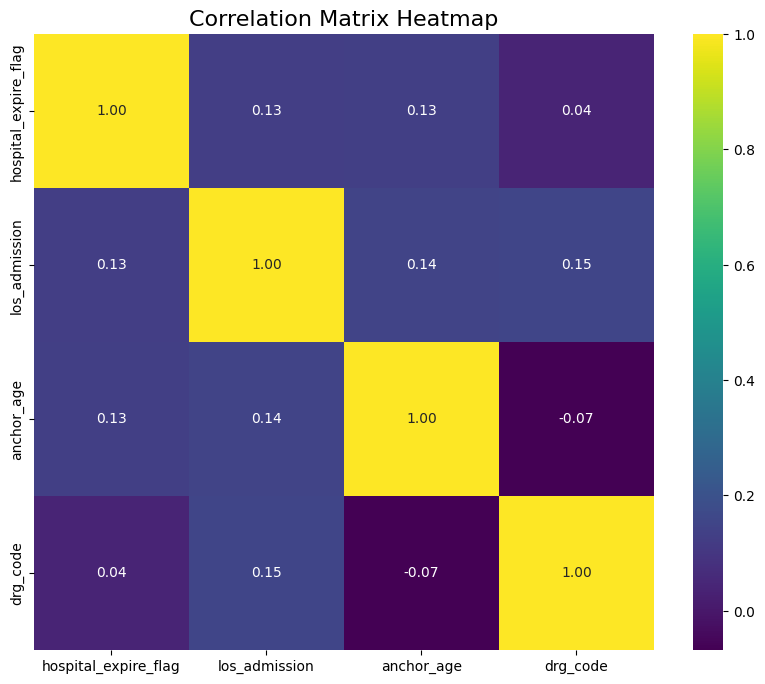

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with the 'viridis' colormap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', cbar=True, annot_kws={"size": 10})

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()


In [86]:
corr_matrix

,hospital_expire_flag,los_admission,anchor_age,drg_code
hospital_expire_flag,1.000000,0.125043,0.130954,0.036886
los_admission,0.125043,1.000000,0.144730,0.148917
anchor_age,0.130954,0.144730,1.000000,-0.068179
drg_code,0.036886,0.148917,-0.068179,1.000000


Since majority of the columns are categorical we need to compute `cramers_v` or `theils_u`. Since we want to check corelation with `los_admission` we need to calculate `corelation ratio`.

## TO-DO:
- Correlation Coefficient

In [87]:
pip install dython


In [88]:
print(df.dtypes)


admission_type          string[python]
admission_location      string[python]
discharge_location      string[python]
insurance               string[python]
language                string[python]
marital_status          string[python]
race                    string[python]
hospital_expire_flag           float64
los_admission                  float64
gender                  string[python]
anchor_age                     float64
eventtype               string[python]
careunit                string[python]
diagnosis_icd_code      string[python]
drg_type                string[python]
drg_code                       float64
medication              string[python]
event_txt               string[python]
drug                    string[python]
route                   string[python]
org_name                string[python]
test_name               string[python]
ab_name                 string[python]
curr_service            string[python]
dtype: object


In [89]:
# List of columns to convert
columns_to_convert = [
    'admission_type', 'admission_location', 'discharge_location', 'insurance',
    'language', 'marital_status', 'race', 'gender', 'eventtype', 'careunit',
    'diagnosis_icd_code', 'drg_type', 'medication', 'event_txt', 'drug',
    'route', 'org_name', 'test_name', 'ab_name', 'curr_service'
]

# Convert columns to object type
df[columns_to_convert] = df[columns_to_convert].astype('object')

# Verify conversion
print(df.dtypes)


admission_type           object
admission_location       object
discharge_location       object
insurance                object
language                 object
marital_status           object
race                     object
hospital_expire_flag    float64
los_admission           float64
gender                   object
anchor_age              float64
eventtype                object
careunit                 object
diagnosis_icd_code       object
drg_type                 object
drg_code                float64
medication               object
event_txt                object
drug                     object
route                    object
org_name                 object
test_name                object
ab_name                  object
curr_service             object
dtype: object


In [90]:
# Fill missing values in categorical columns
df[columns_to_convert] = df[columns_to_convert].fillna('Unknown')


#Cramér's V and Correlation Ratio

Categorical columns: ['admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'gender', 'eventtype', 'careunit', 'diagnosis_icd_code', 'drg_type', 'medication', 'event_txt', 'drug', 'route', 'org_name', 'test_name', 'ab_name', 'curr_service']


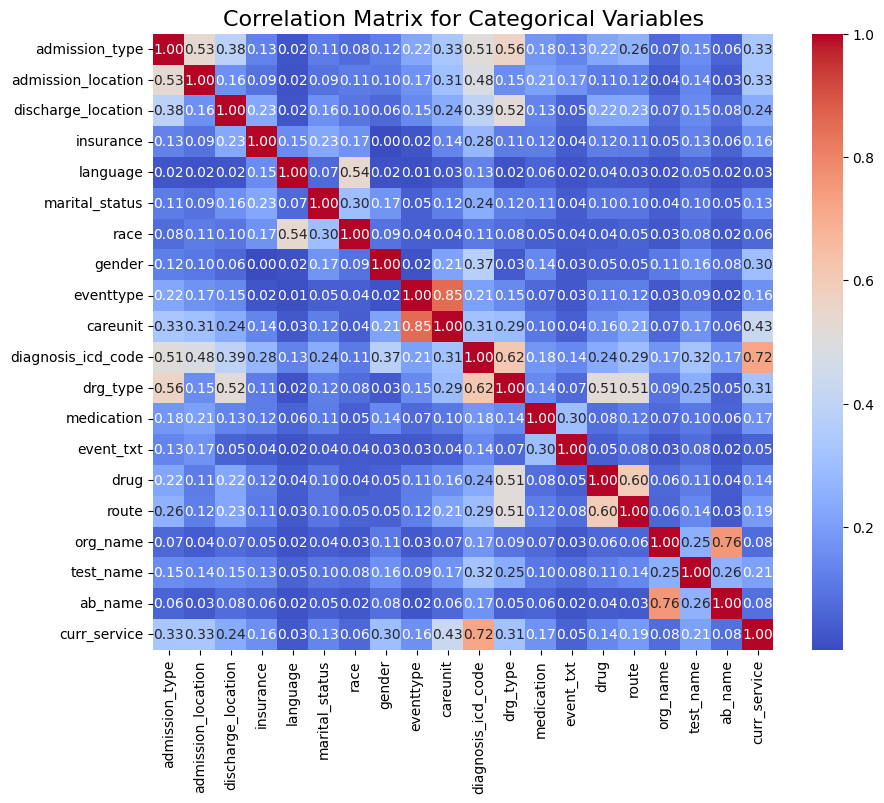

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# Step 2: Handle missing values in categorical columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Calculate associations for categorical variables
associations_result = associations(df[categorical_columns], compute_only=True)

# Extract the correlation matrix for categorical variables
categorical_corr = associations_result['corr']

# Display the correlation matrix for categorical variables
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for Categorical Variables', fontsize=16)
plt.show()




# Transformation Pipelines

In [92]:
categorical_columns = df.select_dtypes(include=['string']).columns.tolist()

In [93]:
categorical_columns

[]

In [94]:
numerical_columns = [df.select_dtypes(exclude=['string']).columns.tolist()[2]]
numerical_columns

['discharge_location']

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [96]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

In [97]:
from sklearn.compose import ColumnTransformer

num_attribs = numerical_columns
cat_attribs = categorical_columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

# Create Test Set

In [98]:
np.random.seed(42)

In [99]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Choose 'hospital_expire_flag' for stratification
strat_column = 'hospital_expire_flag'

# Ensure the chosen column exists
if strat_column in df.columns:
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(df, df[strat_column]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]

    # Verify the split
    print(f"Train set size: {strat_train_set.shape}")
    print(f"Test set size: {strat_test_set.shape}")
else:
    print(f"Column '{strat_column}' does not exist in the DataFrame.")


Train set size: (144541, 24)
Test set size: (36136, 24)


In [100]:
train_set_X = strat_train_set.drop("los_admission", axis = 1)
train_set_y = strat_train_set["los_admission"]

test_set_X = strat_test_set.drop("los_admission", axis = 1)
test_set_y = strat_test_set["los_admission"]

#Code for Data Preprocessing and Stratified Shuffle Split

In [101]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Verify the column names
print("Initial columns:", df.columns)

# Choose 'hospital_expire_flag' for stratification
strat_column = 'hospital_expire_flag'

# Ensure the chosen column exists
if strat_column in df.columns:
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(df, df[strat_column]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]

    # Verify the split
    print(f"Train set size: {strat_train_set.shape}")
    print(f"Test set size: {strat_test_set.shape}")

    # Debug: Print columns of strat_train_set and strat_test_set
    print("Columns in strat_train_set:", strat_train_set.columns)
    print("Columns in strat_test_set:", strat_test_set.columns)

    # Ensure 'los_admission' column is present
    if 'los_admission' in strat_train_set.columns:
        # Separate the features and the target variable
        train_set_X = strat_train_set.drop('los_admission', axis=1)
        train_set_y = strat_train_set['los_admission']

        test_set_X = strat_test_set.drop('los_admission', axis=1)
        test_set_y = strat_test_set['los_admission']

        # Debug: Print shape of train_set_X and verify target column
        print("Shape of train_set_X:", train_set_X.shape)
        print("train_set_y.head():", train_set_y.head())

        # Identify numerical and categorical columns
        numeric_features = train_set_X.select_dtypes(include=['float64']).columns.tolist()
        categorical_features = train_set_X.select_dtypes(include=['object']).columns.tolist()

        # Preprocessing for numerical data
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())])

        # Preprocessing for categorical data
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

        # Combine preprocessing for numerical and categorical data
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)])

        # Example pipeline with a placeholder for a model
        full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

        # Fit and transform the training data
        train_set_X_prepared = full_pipeline.fit_transform(train_set_X)

        print("Shape of transformed training data:", train_set_X_prepared.shape)

        # Transform the test data
        test_set_X_prepared = full_pipeline.transform(test_set_X)

        print("Shape of transformed test data:", test_set_X_prepared.shape)

    else:
        print("Column 'los_admission' does not exist in the training set.")
else:
    print(f"Column '{strat_column}' does not exist in the DataFrame.")


Initial columns: Index(['admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'race',
       'hospital_expire_flag', 'los_admission', 'gender', 'anchor_age',
       'eventtype', 'careunit', 'diagnosis_icd_code', 'drg_type', 'drg_code',
       'medication', 'event_txt', 'drug', 'route', 'org_name', 'test_name',
       'ab_name', 'curr_service'],
      dtype='object')
Train set size: (144541, 24)
Test set size: (36136, 24)
Columns in strat_train_set: Index(['admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'marital_status', 'race',
       'hospital_expire_flag', 'los_admission', 'gender', 'anchor_age',
       'eventtype', 'careunit', 'diagnosis_icd_code', 'drg_type', 'drg_code',
       'medication', 'event_txt', 'drug', 'route', 'org_name', 'test_name',
       'ab_name', 'curr_service'],
      dtype='object')
Columns in strat_test_set: Index(['admission_type', 'admission_location', 'disc

In [102]:
train_set_X_prepared = full_pipeline.fit_transform(train_set_X)

In [103]:
train_set_X_prepared.shape

(144541, 10582)

In [104]:
train_set_X_prepared

<144541x10582 sparse matrix of type '<class 'numpy.float64'>'
	with 3324443 stored elements in Compressed Sparse Row format>

In [105]:
X_test_prepared = full_pipeline.transform(test_set_X)

# Select and Train a Model

# Training and Evaluating on the Training Set

In [106]:
from sklearn.linear_model import LinearRegression

lin_reg_instance = LinearRegression()
lin_reg_instance.fit(train_set_X_prepared, train_set_y)

LinearRegression()

In [107]:
some_data = train_set_X.iloc[:5]
some_labels = train_set_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predictions : {lin_reg_instance.predict(some_data_prepared)}")

Predictions : [3.31159197 0.12372507 3.01571451 6.94882413 9.77542813]


In [108]:
print(f"Labels : {some_labels}")

Labels : 132952     2.075694
37811      0.676389
37377      3.961111
169840    12.750694
70226     16.199306
Name: los_admission, dtype: float64


In [109]:
from sklearn.metrics import mean_squared_error

los_admission_predictions = lin_reg_instance.predict(train_set_X_prepared)
lin_mse = mean_squared_error(train_set_y, los_admission_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.63882998720753

In [110]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_set_y, los_admission_predictions)
lin_mae

2.2425824057717656

In [111]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_instance = DecisionTreeRegressor(random_state=42)

In [112]:
tree_reg_instance.fit(train_set_X_prepared, train_set_y)

DecisionTreeRegressor(random_state=42)

In [113]:
los_admission_predictions = tree_reg_instance.predict(train_set_X_prepared)
lin_mse = mean_squared_error(train_set_y, los_admission_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.026365654955268977

#Training and Evaluating Multiple Regression Models

# Analyze the Best Models

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Sample a fraction of the dataset for faster testing
df_sampled = df.sample(frac=0.1, random_state=42)  # 10% of the data

# Reset index to ensure continuous indexing after sampling
df_sampled = df_sampled.reset_index(drop=True)

# Stratified split on the sampled data
strat_column = 'hospital_expire_flag'
if strat_column in df_sampled.columns:
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(df_sampled, df_sampled[strat_column]):
        strat_train_set = df_sampled.loc[train_index].copy()
        strat_test_set = df_sampled.loc[test_index].copy()

    train_set_X = strat_train_set.drop("los_admission", axis=1)
    train_set_y = strat_train_set["los_admission"]

    test_set_X = strat_test_set.drop("los_admission", axis=1)
    test_set_y = strat_test_set["los_admission"]

    # Fit and transform the training data
    train_set_X_prepared = full_pipeline.fit_transform(train_set_X)
    test_set_X_prepared = full_pipeline.transform(test_set_X)

    # Dictionary to store models and their respective RMSE values
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1),  # Reduced number of estimators and enable parallel processing
        "SVR": SVR(kernel="linear", C=1)
    }

    # Function to calculate RMSE
    def calculate_rmse(model, X, y):
        predictions = model.predict(X)
        mse = mean_squared_error(y, predictions)
        rmse = np.sqrt(mse)
        return rmse

    # Fit models and calculate RMSE
    results = []
    for model_name, model in models.items():
        model.fit(train_set_X_prepared, train_set_y)
        train_rmse = calculate_rmse(model, train_set_X_prepared, train_set_y)
        test_rmse = calculate_rmse(model, test_set_X_prepared, test_set_y)
        results.append((model_name, train_rmse, test_rmse))
        print(f"{model_name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

    # Print summary
    print("Model Performance Summary:")
    for model_name, train_rmse, test_rmse in results:
        print(f"{model_name} - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")

else:
    print(f"Column '{strat_column}' does not exist in the DataFrame.")


Linear Regression - Train RMSE: 3.68, Test RMSE: 6.02
Decision Tree - Train RMSE: 0.01, Test RMSE: 6.27
Random Forest - Train RMSE: 2.15, Test RMSE: 5.68
SVR - Train RMSE: 5.06, Test RMSE: 5.77
Model Performance Summary:
Linear Regression - Train RMSE: 3.68, Test RMSE: 6.02
Decision Tree - Train RMSE: 0.01, Test RMSE: 6.27
Random Forest - Train RMSE: 2.15, Test RMSE: 5.68
SVR - Train RMSE: 5.06, Test RMSE: 5.77


### Model Performance Analysis

Based on the RMSE (Root Mean Squared Error) values obtained from training and testing different regression models, we can draw the following conclusions about their performance:

#### Linear Regression
- **Train RMSE**: 3.68
- **Test RMSE**: 6.02
- **Analysis**: The Linear Regression model has a moderate train RMSE and a higher test RMSE, indicating that the model may not generalize well to unseen data. The difference between train and test RMSE suggests some degree of overfitting.

#### Decision Tree
- **Train RMSE**: 0.01
- **Test RMSE**: 6.27
- **Analysis**: The Decision Tree model shows an extremely low train RMSE but a significantly higher test RMSE. This indicates severe overfitting, where the model performs exceptionally well on the training data but fails to generalize to the test data.

#### Random Forest
- **Train RMSE**: 2.15
- **Test RMSE**: 5.68
- **Analysis**: The Random Forest model demonstrates good performance with a relatively low train RMSE and the lowest test RMSE among the models tested. This suggests that the model has a good balance between fitting the training data and generalizing to new data, making it the best-performing model in this comparison.

#### Support Vector Regressor (SVR)
- **Train RMSE**: 5.06
- **Test RMSE**: 5.77
- **Analysis**: The SVR model shows higher RMSE values for both training and testing compared to the Random Forest model. The close values of train and test RMSE indicate that the model generalizes better than the Decision Tree but not as well as the Random Forest.

### Summary
- **Best Model**: Random Forest is the best model based on the lowest test RMSE of 5.68, indicating better generalization to unseen data.
- **Overfitting**: The Decision Tree model shows severe overfitting, as evidenced by the large gap between train and test RMSE.
- **Generalization**: Linear Regression and SVR have higher test RMSE values than Random Forest, suggesting that they are less effective in capturing the underlying patterns in the data.

### Conclusion
The Random Forest model is the most effective at predicting the target variable with the lowest test RMSE, indicating a good balance between fitting the training data and generalizing to new data. Future work could include further tuning of hyperparameters and exploring more complex models or feature engineering to improve performance even further.

# Evaluate Your System on the Test Set

## A full pipeline with both preparation and prediction


In [131]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(train_set_X, train_set_y)
full_pipeline_with_predictor.predict(some_data)

array([ 1.44008967,  0.70688801,  4.57906981,  7.45278604, 11.75828761])

In [132]:
my_model = full_pipeline_with_predictor

In [133]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [135]:
df.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,los_admission,gender,...,drg_type,drg_code,medication,event_txt,drug,route,org_name,test_name,ab_name,curr_service
0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0.0,0.786111,F,...,APR,283.0,Potassium Chloride,Administered,Acetaminophen,PO/NG,None,Other,None,MED
1,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0.0,0.298611,F,...,OTHER,0.0,Unknown,Unknown,None,None,None,None,None,MED
2,EW EMER.,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,0.0,4.538889,M,...,APR,42.0,Pramipexole,Administered,Other,PO/NG,None,"Blood Culture, Routine",None,MED
3,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,SINGLE,WHITE,0.0,0.407639,M,...,OTHER,0.0,Unknown,Unknown,None,None,Other,Other,None,MED
4,EU OBSERVATION,EMERGENCY ROOM,Other,Other,ENGLISH,DIVORCED,WHITE,0.0,0.532639,F,...,APR,308.0,Influenza Vaccine Quadrivalent,Hold Dose,Heparin,SC,Other,Other,None,MED


In [142]:
# Ensure the required directory exists
import os

# Path to save the CSV file
save_path = '/content/drive/MyDrive/dataset/ch_03_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(save_path, index=False)

print(f"DataFrame saved to {save_path}")


DataFrame saved to /content/drive/MyDrive/dataset/ch_03_dataset.csv
